In [285]:
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

import sklearn.metrics as mtr
import numpy as np

In [141]:
# the original dataset "load_boston" has ethical problem, now california
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X, y = california.data, california.target

In [168]:
# 拆分数据集
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size = 0.2)

MedInc：区域内家庭收入的中位数（单位：10,000美元）。

HouseAge：房屋的中位数年龄（单位：年）。

AveRooms：每个住宅单元的平均房间数。

AveBedrms：每个住宅单元的平均卧室数。

Population：区域内的总人口数量。

AveOccup：每个住宅单元的平均住户人数。

Latitude：区域的纬度（地理坐标）。

Longitude：区域的经度（地理坐标）。

MedHouseVal：目标变量，区域内房价的中位数（单位：10,000美元）

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


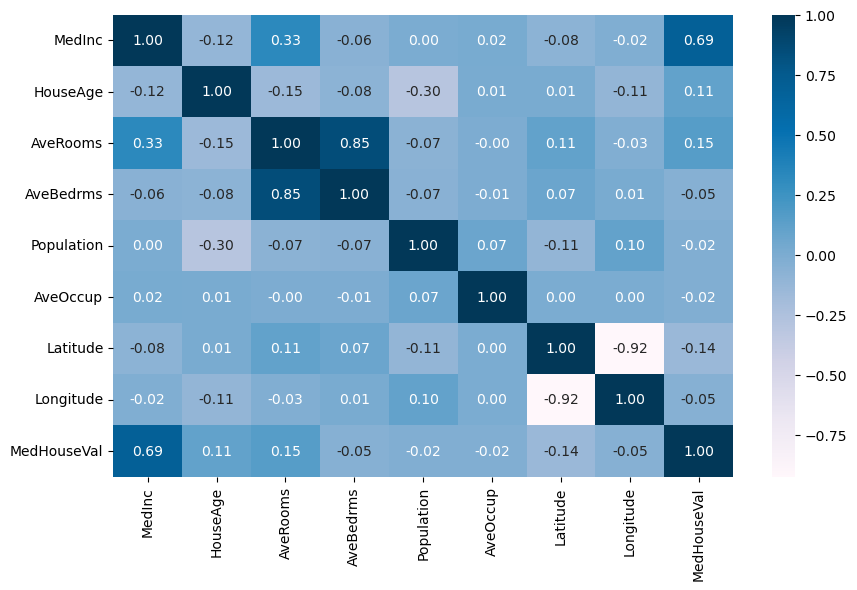

In [196]:

data_df = pd.DataFrame(X, columns=california.feature_names)
y = pd.Series(y, name="MedHouseVal")
data_df['MedHouseVal'] = y

plt.figure(figsize=(10, 6))
data=pd.DataFrame(X)
sns.heatmap(data_df.corr(), annot=True, fmt='.2f', cmap='PuBu')

data_df.head(10)

In [198]:
# 训练模型
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [200]:
y_hat = model.predict(X_test)
y_hat

array([1.4518083 , 2.4349869 , 2.19586348, ..., 2.86614216, 2.447568  ,
       2.21353046])

In [204]:
mse = mtr.mean_squared_error(y_true, y_hat) #均方误差
r2 = mtr.r2_score(y_true, y_hat) #R2分数
mse, r2 #一般

(0.5380112209833061, 0.5887840639843528)

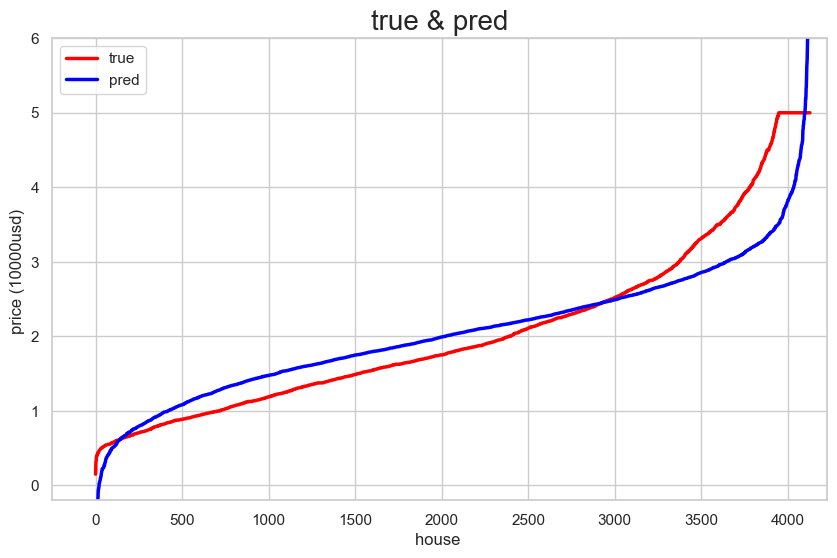

In [294]:
sns.set(style="whitegrid") #风格
plt.figure(figsize=(10, 6)) #大小
y_true_s = pd.Series(y_true) 
y_hat_s = pd.Series(y_hat) #转成series来按值排序
y_true_price = y_true_s.sort_values()
y_pred_price = y_hat_s.sort_values() # 按值排序

plt.plot(y_true_s.index, y_true_price, color="red", linewidth=2.5, label="true")
plt.plot(y_hat_s.index, y_pred_price, color="blue", linewidth=2.5, label="pred") #画

plt.xlim(-250, max(y_true_s.index+100))  
plt.ylim(-0.2, max(y_true_price+1))
plt.title("true & pred", size = 20)
plt.xlabel("house ")
plt.ylabel("price (10000usd) ")
plt.legend()
plt.show()